# Getting Started with Neural Networks (Using Keras)


We focus on feedforward nets, and we use the MNIST data set as an example.

### Step 1: data visualization and preprocessing

In [1]:
# install tensorflow...because it doesn't come with anaconda
import numpy as np
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('training data set size for inputs: ', x_train.shape)
print('training data set size for outputs: ', y_train.shape)
print('test data set size for inputs: ', x_test.shape)
print('test data set size for outputs: ', y_test.shape)

training data set size for inputs:  (60000, 28, 28)
training data set size for outputs:  (60000,)
test data set size for inputs:  (10000, 28, 28)
test data set size for outputs:  (10000,)


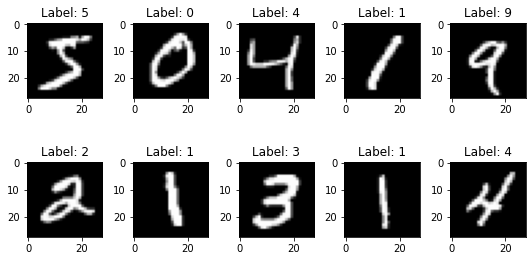

In [3]:
# plot some of the input images
import matplotlib.pyplot as plt
%matplotlib inline

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [4]:
# print first image before
#print(x_train[0,:,:])

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
# need to do this with cross entropy loss func
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model 1: 0 Hidden Layers


In [5]:
# softmax regression
reg_model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
# estimate parameters
batch_size = 10
epochs = 20
reg_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
results = reg_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
6000/6000 [==============================] - 4s 576us/step - loss: 0.7905 - accuracy: 0.7976
Epoch 2/20
6000/6000 [==============================] - 4s 586us/step - loss: 0.3674 - accuracy: 0.8978
Epoch 3/20
6000/6000 [==============================] - 3s 579us/step - loss: 0.3327 - accuracy: 0.9061
Epoch 4/20
6000/6000 [==============================] - 3s 540us/step - loss: 0.3209 - accuracy: 0.9104
Epoch 5/20
6000/6000 [==============================] - 3s 583us/step - loss: 0.3120 - accuracy: 0.9129
Epoch 6/20
6000/6000 [==============================] - 4s 588us/step - loss: 0.3048 - accuracy: 0.9153
Epoch 7/20
6000/6000 [==============================] - 3s 579us/step - loss: 0.3026 - accuracy: 0.9158
Epoch 8/20
6000/6000 [==============================] - 3s 573us/step - loss: 0.2887 - accuracy: 0.9190
Epoch 9/20
6000/6000 [==============================] - 3s 567us/step - loss: 0.2882 - accuracy: 0.9194
Epoch 10/20
6000/6000 [==============================] - 3s 559u

Text(0.5, 0, 'epoch')

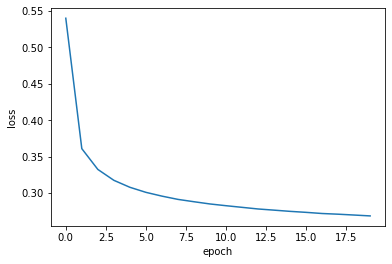

In [7]:
# plot loss improvement
plt.plot(results.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [8]:
# evaluate out of sample accuracy
score = reg_model.evaluate(x_test, y_test)
#print("Test loss:", score[0])

print("Test accuracy:", np.round(score[1]*100, 2), "%")

313/313 [==============================] - 0s 569us/step - loss: 0.2707 - accuracy: 0.9235
Test accuracy: 92.35 %


the W weight matrix has shape  (784, 10)


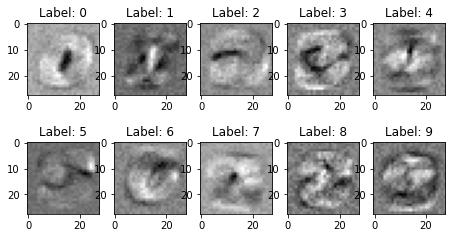

In [9]:
# visualize weights
print("the W weight matrix has shape ", reg_model.weights[0].shape)
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
W = reg_model.weights[0]
for which_label in range(num_row*num_col):
    ax = axes[which_label//num_col, which_label%num_col]
    column_of_W = np.array(W[:,which_label]).reshape((28,28))
    ax.imshow(column_of_W, cmap='gray')
    ax.set_title('Label: {}'.format(which_label))

# Model 2: Adding 1 Hidden Layer


In [10]:
# one hidden layer 
one_hidden_model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="relu"),   # <------- new!
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
one_hidden_model.summary()
batch_size = 10
epochs = 20
one_hidden_model.compile(loss="categorical_crossentropy", 
                         optimizer="SGD", metrics=["accuracy"])
results = one_hidden_model.fit(x_train, 
                               y_train, 
                               batch_size=batch_size, 
                               epochs=epochs)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6000/6000 [==============================] - 4s 657us/step - loss: 0.7061 - accuracy: 0.8115
Epoch 2/20
6000/6000 [==============================] - 4s 681us/step - loss: 0.2670 - accuracy: 0.9240
Epoch 3/20
6000/6000 [==============================] - 4s 658us/step - loss: 0.2172 - accuracy: 0.9398
Epoch 4/20
6000/6000 [==============================] - 4s 657us/ste

Text(0.5, 0, 'epoch')

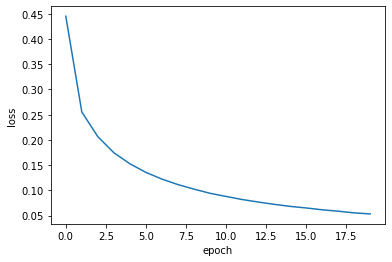

In [11]:
# plot loss improvement
plt.plot(results.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [12]:
# evaluate out of sample accuracy
one_h_score = one_hidden_model.evaluate(x_test, y_test)
print("Test accuracy:", 100*one_h_score[1])

313/313 [==============================] - 0s 588us/step - loss: 0.0872 - accuracy: 0.9731
Test accuracy: 97.31000065803528


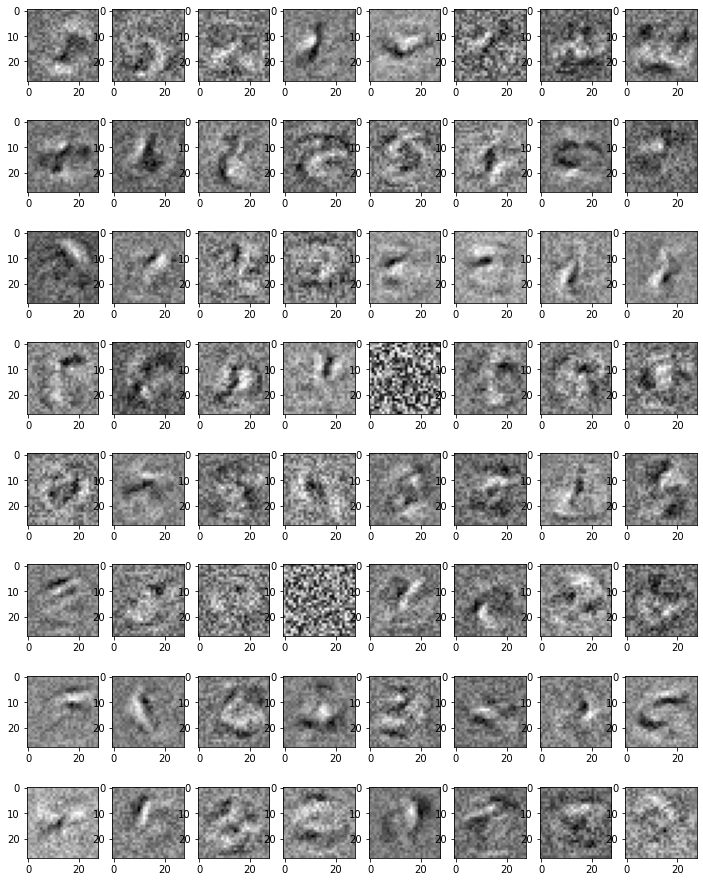

In [13]:
# visualize weights of the hidden layer
# this is pre-nonlinearity
num_row = 8
num_col = 8
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
hiddenW = one_hidden_model.weights[0]
for which_label in range(num_row*num_col):
    ax = axes[which_label//num_col, which_label%num_col]
    column_of_W = np.array(hiddenW[:,which_label]).reshape((28,28))
    ax.imshow(column_of_W, cmap='gray')
    #ax.set_title('Label: {}'.format(which_label))

In [14]:
# visualize which hidden layer units light up on different inputs
def vis_inputs_and_features(input_num):

    # set everything up
    fig, axes = plt.subplots(3, 1, figsize=(1.5,6))
    vis_mod = keras.models.Model(
        inputs=one_hidden_model.input, 
        outputs=[layer.output for layer in one_hidden_model.layers])
    vis_outs = vis_mod.predict(x_test)
    
    # plot input
    ax = axes[0]
    out1 = vis_outs[0][input_num]
    ax.imshow(out1.reshape((28,28)), cmap='gray')
    ax.set_title('raw input')

    # plot hidden relu layer
    ax = axes[1]
    out2 = vis_outs[1][input_num]
    ax.imshow(out2.reshape((8,8)), cmap='gray')
    ax.set_title('hidden layer (post nonlinearity)')

    # plot softmax output
    ax = axes[2]
    out3 = vis_outs[2][input_num]
    ax.imshow(np.expand_dims(out3, 0), cmap='gray')
    ax.set_title('softmax output prob.s')

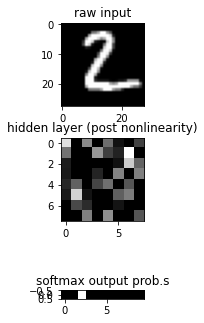

In [15]:
vis_inputs_and_features(1)

# Model 3: a Convolutional Neural Network


In [16]:
# two hidden layers. first one is a cnn filter
img_shape = (28,28,1)
cnn_model = keras.Sequential([
        keras.Input(shape=img_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape = img_shape, activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="relu"),   
        keras.layers.Dense(num_classes, activation="softmax"),
    ])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [28]:
%who

W	 ax	 axes	 batch_size	 cnn_model	 cnn_score	 column_of_W	 epochs	 fig	 
hiddenW	 i	 img_shape	 keras	 np	 num_classes	 num_col	 num_row	 one_h_score	 
one_hidden_model	 plt	 reg_model	 results	 score	 this_kernel	 vis_convolution	 vis_inputs_and_features	 vis_max_pool	 
which_label	 x_test	 x_train	 y_test	 y_train	 


In [17]:
# fit CNN (takes much longer)
batch_size = 10
epochs = 20
cnn_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
results = cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
6000/6000 [==============================] - 16s 3ms/step - loss: 0.5353 - accuracy: 0.8465
Epoch 2/20
6000/6000 [==============================] - 16s 3ms/step - loss: 0.1646 - accuracy: 0.9487
Epoch 3/20
6000/6000 [==============================] - 15s 3ms/step - loss: 0.1165 - accuracy: 0.9646
Epoch 4/20
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0850 - accuracy: 0.9747
Epoch 5/20
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0633 - accuracy: 0.9812
Epoch 6/20
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0552 - accuracy: 0.9837
Epoch 7/20
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0475 - accuracy: 0.9853
Epoch 8/20
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0410 - accuracy: 0.9876
Epoch 9/20
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 10/20
6000/6000 [==============================] - 16s 3ms/step - l

Text(0.5, 0, 'epoch')

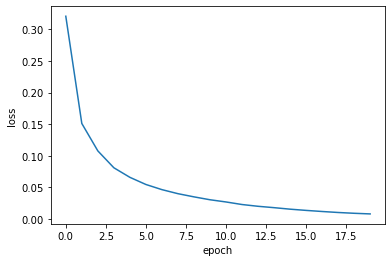

In [18]:
# plot loss improvement
plt.plot(results.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [19]:
# evaluate out of sample accuracy
cnn_score = cnn_model.evaluate(x_test, y_test)
print("Test accuracy:", 100*cnn_score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0474 - accuracy: 0.9864
Test accuracy: 98.64000082015991


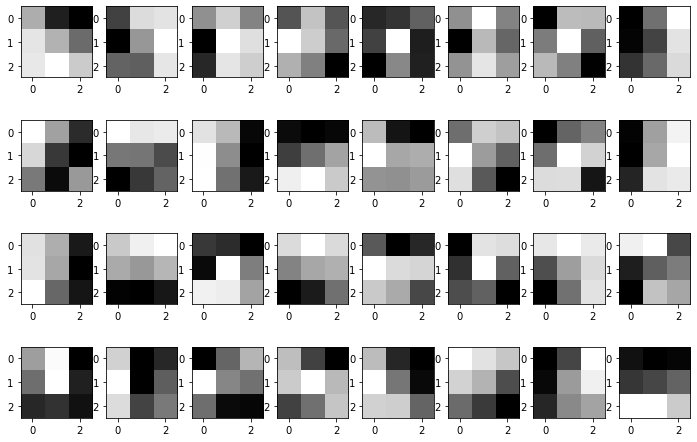

In [20]:
# visualize weights of the cnn hidden layer
# this is pre-nonlinearity
num_row = 4
num_col = 8
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
hiddenW = cnn_model.weights[0]
for which_label in range(num_row*num_col):
    ax = axes[which_label//num_col, which_label%num_col]
    this_kernel = np.array(hiddenW[:,:,0,which_label])
    ax.imshow(this_kernel, cmap='gray')
    #ax.set_title('Label: {}'.format(which_label))

In [21]:
# visualize a single kernel (32 available) applied to input image
# this is pre-nonlinearity again
def vis_convolution(which_input):
    """visualize an input and the outputs from all your kernels"""
    input_img = x_test[which_input,:,:,0]
    
    # set up plotting stuff
    output_images = []
    for which_kernel in range(32):
        my_kernel = cnn_model.weights[0][:,:,0,which_kernel]
        output_img = np.empty((26,26))
        for row in range(26):
            for col in range(26):
                output_img[row,col] = np.sum(input_img[row:row+3,col:col+3] * my_kernel)
                
        output_images.append(output_img)

    # plot input next to all outputs
    num_row = 5
    num_col = 7
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*6,2*6))
    for j in range(1,33):
        i = j-1
        ax = axes[i//num_col, i%num_col]
        ax.imshow(output_images[i], cmap='gray')
    
    axes[4,4].imshow(input_img, cmap='gray')
    axes[4,4].set_title('input')

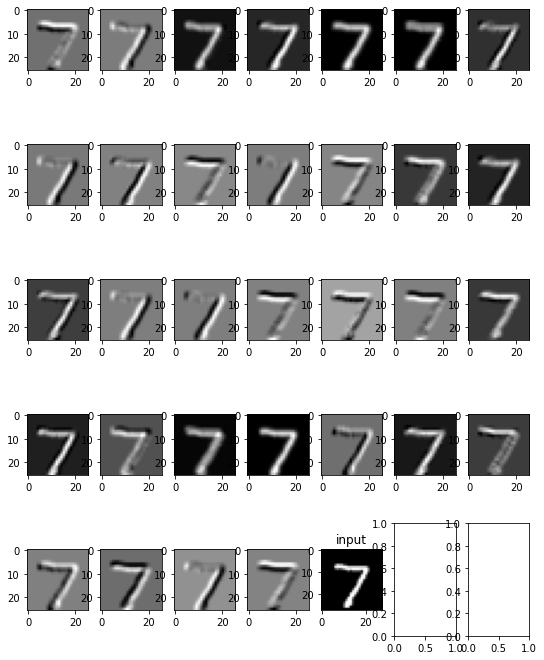

In [22]:
vis_convolution(0)


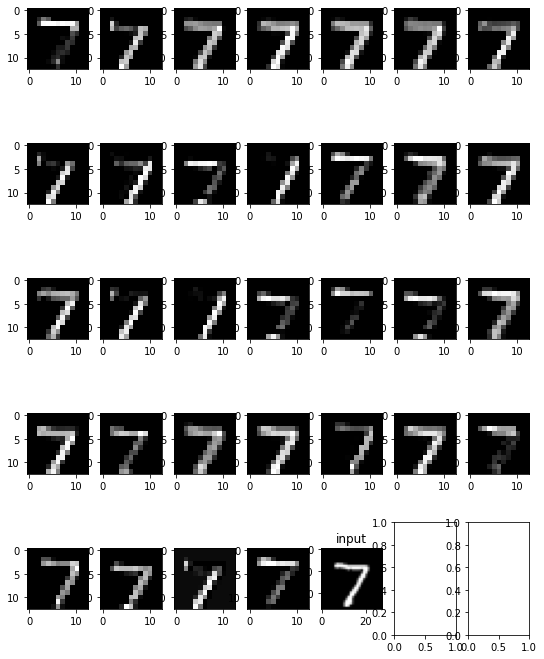

In [23]:
# visualize a single kernel (32 available) applied to input image
# this is pre-nonlinearity again
def vis_max_pool(which_input):
    """visualize an input and the outputs from all your kernels"""
    input_img = x_test[which_input,:,:,0]

    # get max pool layer outputs
    tmp_mp_vis_mod = keras.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer(index=1).output)
    mp_out = tmp_mp_vis_mod.predict(x_test)
    #mp_out[which_input,:,:,which_kernel]

    # plot input next to all outputs
    num_row = 5
    num_col = 7
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*6,2*6))
    for which_kernel in range(32):
        ax = axes[which_kernel//num_col, which_kernel%num_col]
        ax.imshow(mp_out[which_input,:,:,which_kernel], cmap='gray')
    
    axes[4,4].imshow(input_img, cmap='gray')
    axes[4,4].set_title('input')
    
vis_max_pool(0)



### sources

https://github.com/keras-team/keras-io/blob/master/examples/vision/mnist_convnet.py

https://www.deeplearningbook.org

http://alexlenail.me/NN-SVG/LeNet.html

https://keras.io/examples/vision/visualizing_what_convnets_learn/
